# Iris-Dataset modelled by Support-Vector-Machine (SVM) with scikit-learn 
Training a SVM-model with scikit-learn

Import and load of Iris dataset

In [33]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Daten-Preprocessing

Definition von Netz-input X und und Labels y and normalization of feature inputs X

In [34]:
from sklearn.model_selection import train_test_split                # type: ignore
from sklearn.preprocessing import StandardScaler                    # type: ignore

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# StandardScaler is a class that is used to standardize the dataset
sc = StandardScaler()
sc.fit(X_train) # estimate the sample mean and standard deviation for each feature dimension
# The transform method is then used to standardize the training data using those estimated parameters
X_train_std = sc.transform(X_train) # standardize the training data
X_test_std = sc.transform(X_test) # standardize the test data

## Model training

In [40]:
from sklearn.svm import SVC # type: ignore
# SVC is the Support Vector Classification class
svm = SVC(kernel='linear', C=1.0, random_state=1, probability=True) 
# The fit method is used to train the SVM model on the training data
svm.fit(X_train_std, y_train) # fit the model to the training data

SVC(kernel='linear', probability=True, random_state=1)

In [36]:
from matplotlib.colors import ListedColormap            # type: ignore
import matplotlib.pyplot as plt                         # type: ignore

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

## Visialization

C:\Users\weber\AppData\Local\Temp\ipykernel_22184\923673620.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


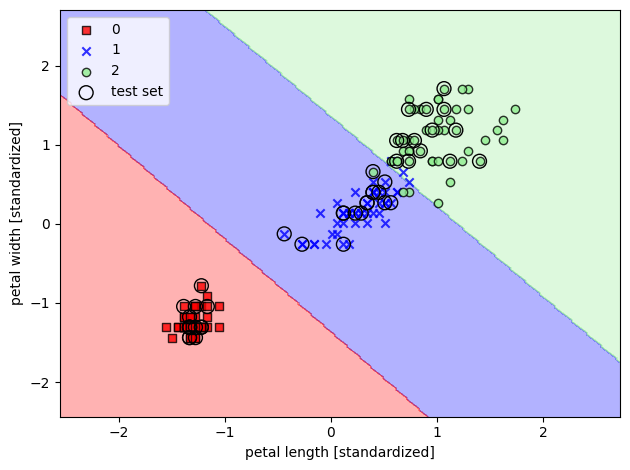

In [37]:
X_combined_std = np.vstack((X_train_std, X_test_std)) # stack arrays in sequence vertically (row wise)
y_combined = np.hstack((y_train, y_test)) # stack arrays in sequence horizontally (column wise)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

Mit der predict_proba-Methode können wir die Wahrscheinlichkeiten der Klassenzugehörigkeit
der Objekte vorhersagen, beispielsweise für die ersten drei Exemplare
der Testdatenmenge:

In [ ]:
svm.predict_proba(X_test_std[:3, :])

array([[0.00772374, 0.01640841, 0.97586785],
       [0.92249209, 0.05497364, 0.02253427],
       [0.95813714, 0.02701406, 0.0148488 ]])

Die erste Zeile gibt die Wahrscheinlichkeiten der Klassenzugehörigkeit der ersten
Blume an, die zweite Zeile die Wahrscheinlichkeiten der zweiten Blume usw. Beachten
Sie, dass die Summe der drei Spalten jeder Zeile erwartungsgemäß 1 ergibt.
Sie können das durch die Ausführung von

In [44]:
# sum of the probabilities of the three classes for each sample is 1
svm.predict_proba(X_test_std[:3, :]).sum(axis=1) 


array([1., 1., 1.])

Der höchste Wert in der ersten Zeile ist rund 0,85, also gehört das erste Exemplar mit einer vorhergesagten Wahrscheinlichkeit von 85 % zur dritten Klasse (Iris virginica). Wir können also die vorhergesagte Klasse anhand des höchsten Wertes einer Zeile ermitteln, z.B. mittels NumPys argmax-Funktion:

In [45]:
svm.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

Im letzten Codebeispiel haben wir die bedingten Wahrscheinlichkeiten berechnet und mittels NumPys argmax-Funktion manuell in Klassenbezeichnungen konvertiert. In der Praxis ist es bei der Verwendung von scikit-learn komfortabler, die predict-Methode direkt aufzurufen:

In [46]:
svm.predict(X_test_std[:3, :])


array([2, 0, 0])

Zum Abschluss noch eine Warnung, für den Fall, dass Sie die Klassenbezeichnung
einer einzelnen Blume vorhersagen möchten: scikit-learn erwartet als Eingabe
ein zweidimensionales Array. Ein einzelner Slice muss also zunächst in
dieses Format konvertiert werden. Zum Hinzufügen einer weiteren Dimension
können Sie NumPys reshape-Methode verwenden:

In [47]:
svm.predict(X_test_std[0, :].reshape(1, -1))

array([2])